## Dataset Download

In [1]:
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

!mkdir div2k

# !unzip -q DIV2K_valid_LR_bicubic_X2.zip -d div2k
# !unzip -q DIV2K_train_LR_bicubic_X2.zip -d div2k
!unzip -q DIV2K_valid_HR.zip -d div2k
!unzip -q DIV2K_train_HR.zip -d div2k

!mv ./div2k/DIV2K_train_HR/*.png ./div2k/
!mv ./div2k/DIV2K_valid_HR/*.png ./div2k/
!rmdir ./div2k/DIV2K_train_HR
!rmdir ./div2k/DIV2K_valid_HR
!rm DIV2K_train_HR.zip
!rm DIV2K_valid_HR.zip

%cd /content/drive/MyDrive/Colab\ Notebooks/SR_Deep_ET

--2023-06-20 09:45:33--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip [following]
--2023-06-20 09:45:33--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448993893 (428M) [application/zip]
Saving to: ‘DIV2K_valid_HR.zip’

DIV2K_valid_HR.zip  100%[===================>] 428.19M  24.1MB/s    in 18s     

2023-06-20 09:45:51 (24.2 MB/s) - ‘DIV2K_valid_HR.zip’ saved [448993893/448993893]

--2023-06-20 09:45:51--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (d

## Install Requirements

In [2]:
!pip install torchmetrics
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 10.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 103.4 MB/s eta 0:00:00


## Train

In [3]:
!pwd
!nvidia-smi

/content/drive/MyDrive/Colab Notebooks/SR_Deep_ET
Tue Jun 20 09:49:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                      

preload : True  /  model : abpn  /  hr size : 192  /  lr size : 64  /  feature : 28  /  optimizer : adam  /  epoch : 100  /  step : 20  /  gamma : 0.4

In [9]:
# !python train.py --data-path /content/div2k --preload --batch-size 16 --model rlfn --device cuda
# !python train.py --data-path /content/div2k --preload --model abpn --epochs 100 --step 20 --gamma 0.4 --save_interval 10 --device cuda
!python train.py --data-path /content/div2k --preload --model abpn --epochs 100 --step 30 --gamma 0.2 --save_interval 10 --device cuda

100% 720/720 [01:18<00:00,  9.14it/s]
 ==> IMAGE PRELOAD COMPLETE
100% 180/180 [00:21<00:00,  8.42it/s]
 ==> IMAGE PRELOAD COMPLETE
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
# Train Super Resolution Model [1/100]
# VALID : PSNR=18.875, SSIM=0.45900: 100%|██████████████████████████████████████████████| 12/12 [00:02<00:00,  5.67it/s]
# Train Super Resolution Model [2/100]
# VALID : PSNR=19.274, SSIM=0.48548: 100%|██████████████████████████████████████████████| 12/12 [00:00<00:00, 27.40it/s]
# Train Super Resolution Model [3/100]
# VALID : PSNR=19.376, SSIM=0.4972

## Test

In [1]:
%cd /content/drive/MyDrive/Colab\ Notebooks/SR_Deep_ET

import cv2
import torch
import numpy as np
from matplotlib import pyplot as plt
from model import abpn, rlfn, innopeak

/content/drive/MyDrive/Colab Notebooks/SR_Deep_ET


In [26]:
def preprocess(x:np.ndarray, norm:bool):
    x = np.transpose(x, [2, 0, 1])    
    x = np.expand_dims(x, axis=0)
    if norm == True:
        x = np.ascontiguousarray(x, dtype=np.float32) / 255.0
    else:
        x = np.ascontiguousarray(x, dtype=np.float32)    
    return x

def postprocess(x:np.ndarray, norm:bool):
    if norm == True:
        x = np.ascontiguousarray(x * 255.0, dtype=np.uint8).squeeze(0)
    else:
        x = np.ascontiguousarray(x, dtype=np.uint8).squeeze(0)
    x = np.transpose(x, [1, 2, 0])      # [C, H, W] -> [H, W, C]
    x = cv2.cvtColor(x, cv2.COLOR_RGB2BGR)
    return x

def bicubicResize(x:np.ndarray, scale:int=4):
    x = cv2.cvtColor(x, cv2.COLOR_RGB2BGR)
    h, w, _ = x.shape
    x = cv2.resize(x, dsize=(w*scale, h*scale), interpolation=cv2.INTER_CUBIC)
    return x

def horizontalFusion(bi:np.ndarray, sr:np.ndarray):
    assert bi.shape == sr.shape, "Check image shape"
    h, w, c = bi.shape
    canvas = np.zeros_like(bi).astype(np.uint8)
    canvas[:, 0:w//2, :] = bi[:, w//4:(w//2 + w//4), :]
    canvas[:, w//2:w, :] = sr[:, w//4:(w//2 + w//4), :]
    return canvas

def openImage(filepath):
    try:
        imgObj = cv2.imread(filepath, cv2.IMREAD_COLOR)
        imgObj = cv2.cvtColor(imgObj, cv2.COLOR_BGR2RGB)
        return imgObj
    except:
        raise ValueError()
    
def npToTensor(x:np.ndarray):
    x = np.transpose(x, [2, 0, 1])
    tensor = torch.from_numpy(x)
    return tensor

In [ ]:
image   = input("Image path : ")
weight  = input("Weight path : ")
model   = input("Model (abpn, rlfn, innopeak) : ")
scale   = int(input("Scale : "))
qat     = bool(input("QAT (y/n) : "))
norm    = bool(input("Normalization (y/n) : "))

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

LR_WINDOW = "LR_WINDOW"
BICUBIC_SR_WINDOW = "BICUBIC vs SUPER-RESOLUTION"

model = abpn.ABPN()
if device == 'cuda':
    model.load_state_dict(torch.load(weight)).cuda()
else:
    model.load_state_dict(torch.load(weight, map_location=device))

model.eval()
print(model.parameters)

cuda:0
<bound method Module.parameters of ABPN(
  (stem): basicConv(
    (conv): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (body): Sequential(
    (0): basicConv(
      (conv): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): basicConv(
      (conv): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): basicConv(
      (conv): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (3): basicConv(
      (conv): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (4): basicConv(
      (conv): Conv2d(28, 27, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (pixel_shuffle): PixelShuffle(upscale_factor=3)
)>


(224, 320, 3)


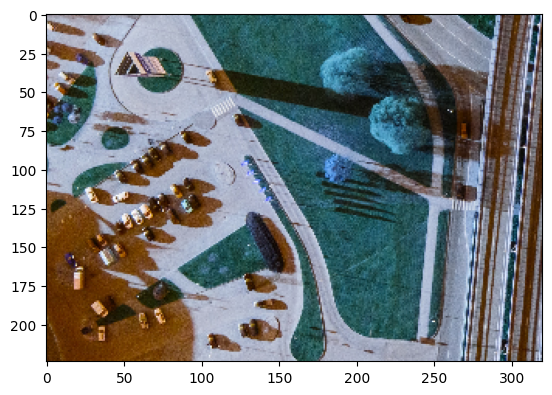

In [27]:
lrObj = openImage(image)
print(lrObj.shape)

plt.imshow(lrObj)
plt.show()

In [ ]:
imgToTensor = torch.from_numpy(preprocess(lrObj, norm))
with torch.no_grad():
    srObj = model(imgToTensor).detach().numpy()
srObj = postprocess(srObj, norm)

cv2.namedWindow(BICUBIC_SR_WINDOW)

bicubic = bicubicResize(openImage(image))
canvas = horizontalFusion(bicubic, srObj)

cv2.imshow(BICUBIC_SR_WINDOW, canvas)

cv2.waitKey()
cv2.destroyAllWindows()

# Convert ONNX

In [10]:
%cd /content/drive/MyDrive/Colab\ Notebooks/SR_Deep_ET

import os
import torch
import torch.nn as nn
import torch.onnx
import onnx
from onnx import shape_inference
import torchvision.transforms as T
import time
from PIL import Image
from model import abpn


/content/drive/MyDrive/Colab Notebooks/SR_Deep_ET


In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [12]:
def Convert_ONNX(model:nn.Module, input_shape:tuple, name:str):
    if os.path.exists(name):
        os.remove(name)
        print(f"[WARN] REMOVE FILE = {name}")
    if not name.endswith('.onnx'):
        name = name + '.onnx'

    # set the model to inference mode
    model.eval()

    # Let's create a dummy input tensor
    dummy_input = torch.randn(input_shape, requires_grad=True).to(device)

    # Export the model
    torch.onnx.export(  model,                     # model being run
                        dummy_input,               # model input (or a tuple for multiple inputs)
                        name,                      # where to save the model
                        export_params=True,        # store the trained parameter weights inside the model file
                        input_names = ['input'],   # the model's input names
                        output_names = ['output']  # the model's output names
    )

    # Add shape to onnx model
    onnx.save(onnx.shape_inference.infer_shapes(onnx.load(name)), name)

    print('# Model has been converted to ONNX')
    print(f'# CREATE NEW ONNX FILE = {name}')

In [14]:
weights = "abpn_final.pth"

model = abpn.ABPN()

model.load_state_dict(torch.load(weights))

model.to(device)

Convert_ONNX(model, (1, 3, 224, 320), "x4_224_320.onnx")    # (B, C, H, W)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

# Model has been converted to ONNX
# CREATE NEW ONNX FILE = x4_224_320.onnx
